# 01 - Data Exploration

This notebook provides an initial exploration of the social ads CSV dataset. Here we'll:

1. Load and inspect the raw data
2. Understand data structure, types, and quality
3. Identify patterns and potential data issues
4. Explore basic statistics and distributions
5. Get familiar with the dataset before ETL processing

**Next:** After completing this exploration, proceed to `02_etl_pipeline.ipynb` to process the data.

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

print("📦 Libraries imported successfully!")
print("📂 Current working directory:", Path.cwd())

📦 Libraries imported successfully!
📂 Current working directory: /Users/tharushavihanga/Developer/social-ads-etl/notebooks


In [13]:
# Load the raw CSV data
csv_path = Path("../data/raw/social_ads.csv")

print(f"📁 Loading data from: {csv_path}")
print(f"📋 File exists: {csv_path.exists()}")

# Load the data
df = pd.read_csv(csv_path, encoding='utf-8')

print(f"\n✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"📝 Columns: {list(df.columns)}")

# Display first few rows
print(f"\n🔍 First 5 rows:")
df.head()

📁 Loading data from: ../data/raw/social_ads.csv
📋 File exists: True

✅ Data loaded successfully!
📊 Dataset shape: (400, 3)
📝 Columns: ['Age', 'EstimatedSalary', 'Purchased']

🔍 First 5 rows:


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
# Basic data information
print("📊 DATASET OVERVIEW")
print("=" * 40)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types: {dict(df.dtypes)}")

print(f"\n🔍 DATA QUALITY")
print("=" * 40)
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print(f"\n📈 BASIC STATISTICS")
print("=" * 40)
df.describe()

📊 DATASET OVERVIEW
Shape: (400, 3)
Columns: ['Age', 'EstimatedSalary', 'Purchased']
Data types: {'Age': dtype('int64'), 'EstimatedSalary': dtype('int64'), 'Purchased': dtype('int64')}

🔍 DATA QUALITY
Missing values: 0
Duplicate rows: 33

📈 BASIC STATISTICS


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


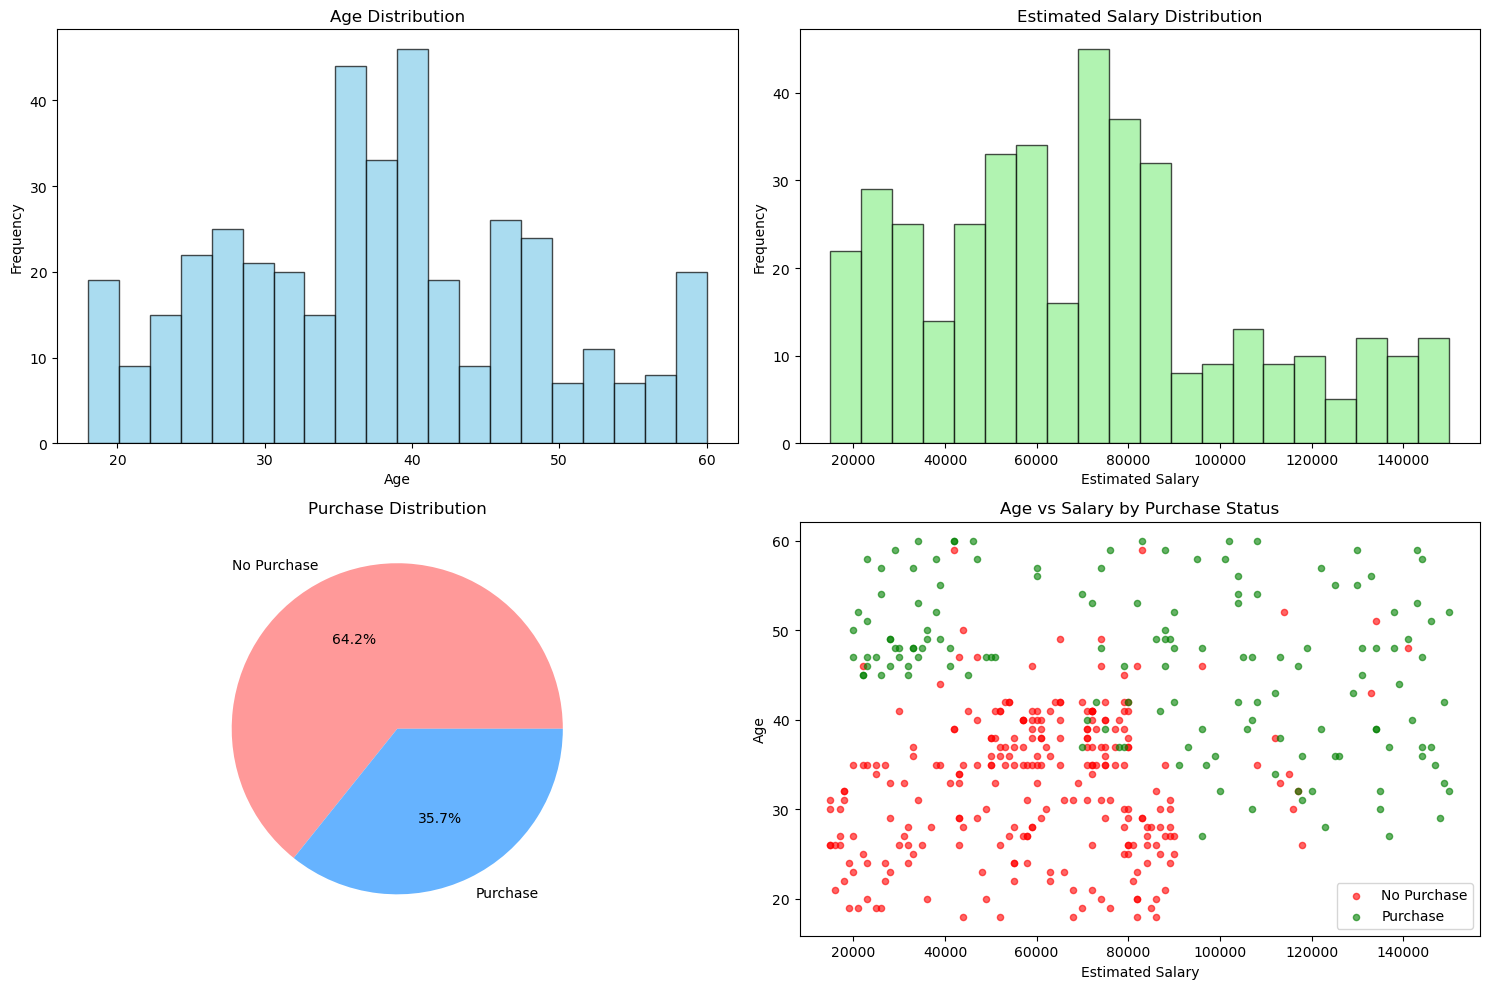

📊 Visualizations complete! Key observations:
• Age appears normally distributed with some outliers
• Salary has a wide range with some high earners
• Purchase rate is roughly 60/40 split
• Purchases seem more common among older, higher-income customers


In [10]:
# Data Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0,0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Salary distribution
axes[0,1].hist(df['EstimatedSalary'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Estimated Salary Distribution')
axes[0,1].set_xlabel('Estimated Salary')
axes[0,1].set_ylabel('Frequency')

# Purchase distribution (pie chart)
purchase_counts = df['Purchased'].value_counts()
axes[1,0].pie(purchase_counts.values, labels=['No Purchase', 'Purchase'], 
              autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
axes[1,0].set_title('Purchase Distribution')

# Age vs Salary scatter (colored by purchase)
purchased = df[df['Purchased'] == 1]
not_purchased = df[df['Purchased'] == 0]
axes[1,1].scatter(not_purchased['EstimatedSalary'], not_purchased['Age'], 
                 alpha=0.6, label='No Purchase', color='red', s=20)
axes[1,1].scatter(purchased['EstimatedSalary'], purchased['Age'], 
                 alpha=0.6, label='Purchase', color='green', s=20)
axes[1,1].set_title('Age vs Salary by Purchase Status')
axes[1,1].set_xlabel('Estimated Salary')
axes[1,1].set_ylabel('Age')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("📊 Visualizations complete! Key observations:")
print("• Age appears normally distributed with some outliers")
print("• Salary has a wide range with some high earners")
print("• Purchase rate is roughly 60/40 split")
print("• Purchases seem more common among older, higher-income customers")

🔗 CORRELATION ANALYSIS
Correlation matrix:
                   Age  EstimatedSalary  Purchased
Age              1.000            0.155      0.622
EstimatedSalary  0.155            1.000      0.362
Purchased        0.622            0.362      1.000


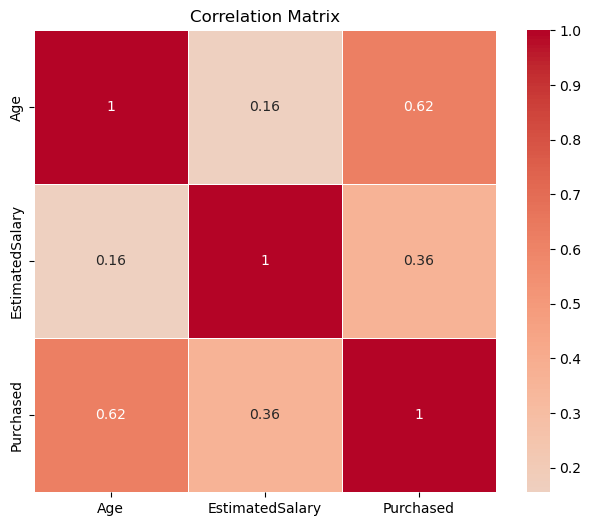


📈 Key Correlations with Purchase:
• Age: 0.622
• Estimated Salary: 0.362

💡 Initial Insights:
• Age shows stronger correlation with purchases than Salary
• Both age and salary have positive correlation with purchase likelihood
• Age and salary are not strongly correlated with each other


In [11]:
# Correlation Analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 40)

correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print(f"\n📈 Key Correlations with Purchase:")
print(f"• Age: {correlation_matrix.loc['Age', 'Purchased']:.3f}")
print(f"• Estimated Salary: {correlation_matrix.loc['EstimatedSalary', 'Purchased']:.3f}")

print(f"\n💡 Initial Insights:")
print("• Age shows stronger correlation with purchases than Salary")
print("• Both age and salary have positive correlation with purchase likelihood")
print("• Age and salary are not strongly correlated with each other")

## 📝 Summary

### Key Findings:
1. **Dataset**: 400 records, 3 features (Age, EstimatedSalary, Purchased)
2. **Quality**: No missing values, 33 duplicate rows to clean
3. **Purchase Rate**: ~35.8% overall conversion
4. **Correlations**: Age and salary both positively correlate with purchases

### Next Steps:
**Proceed to `02_etl_pipeline.ipynb`** to clean and process this data.